In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dynamics_fcns
import analysis.analysis_fcns as analysis_fcns
import matplotlib as mpl
import matplotlib.ticker
from matplotlib.ticker import MultipleLocator

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)
mpl.rc('image', cmap='RdBu_r')

In [3]:
df = pd.read_csv('truth_mag.csv')

In [4]:
t_ar = df.columns[3:83].to_numpy(dtype = float)

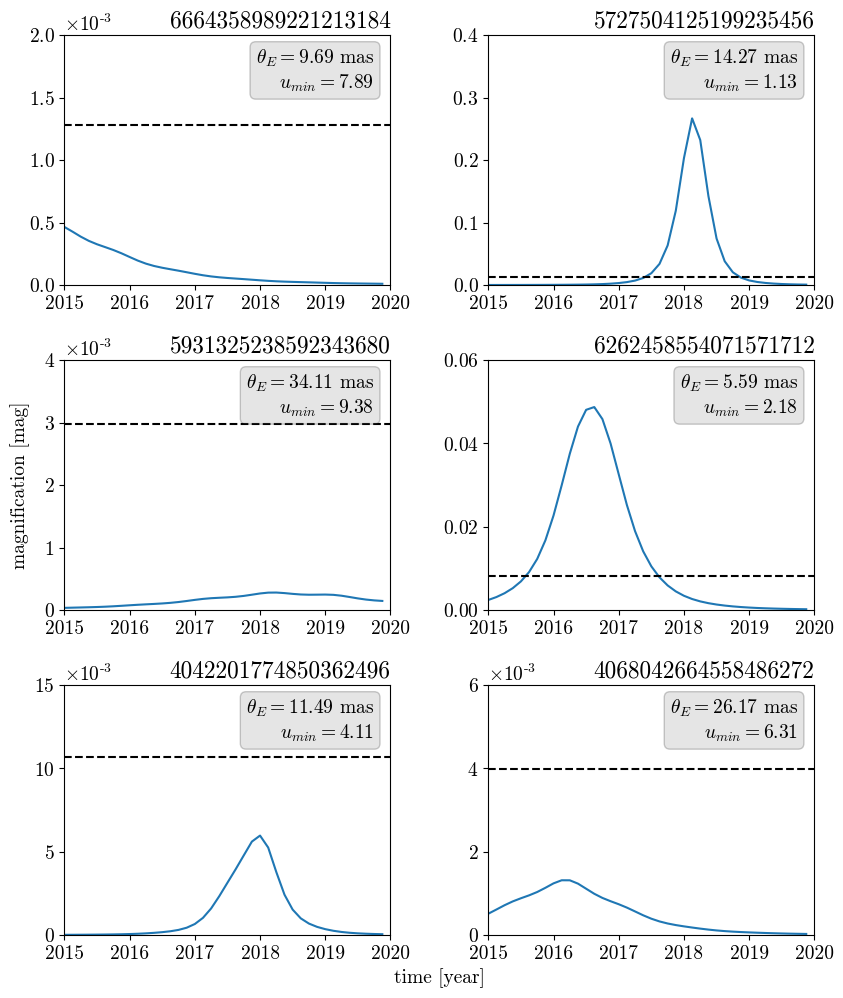

In [47]:
fig = plt.figure(figsize = (7.5, 9))
ax_big = fig.add_subplot(111)
ax_big.spines['top'].set_color('none')
ax_big.spines['bottom'].set_color('none')
ax_big.spines['left'].set_color('none')
ax_big.spines['right'].set_color('none')
ax_big.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)

ylim = [2e-3, 4e-1, 4e-3, 6e-2, 1.5e-2, 6e-3]
mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits([-1,5])

for i in range(6):
    ind = 321+i
    ax = fig.add_subplot(ind)
    ax.plot(t_ar, -df.iloc[i, range(3,83)])
    ax.axhline(df['g_mag_err'][i], color = 'k', linestyle = '--')
    ax.set_title(str(df['source_id'][i]), loc = 'right')
    ax.set_xlim(2015, 2020)
    ax.set_ylim(0, ylim[i])
    
    ax.yaxis.set_major_formatter(mf)
    
    ax.text(0.95, 0.95, 
            '$\\theta_E =$'+ '%.2f'%df['eins'][i] + ' mas\n$u_{min}=$' + '%.2f'%df['u_min'][i], 
            transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=props)
    if i == 3:
        ax.yaxis.set_major_locator(MultipleLocator(0.02))
    if i == 4:
        ax.yaxis.set_major_locator(MultipleLocator(5e-3))
    if i == 5:
        ax.yaxis.set_major_locator(MultipleLocator(2e-3))
ax_big.set_xlabel('time [year]')
ax_big.set_ylabel('magnification [mag]', labelpad = 0)
plt.subplots_adjust(left=0.0,
                    bottom=0.0,
                    right=1.,
                    top=1.,
                    wspace=0.3,
                    hspace=0.3)

plt.savefig('photometric.pdf', bbox_inches = 'tight', dpi = 500)